# Comparando arquiteturas

### Modelo 1:
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 2:
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 3:
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

# TODO:  Modelo 4: MobileNet (com freeze em todas as camadas)

# TODO:  Modelo 5: VGG16 (com freeze em todas as camadas)


# TODO: criar modelos MobileNet e VGG16 com algumas camadas descongeladas

In [1]:
# seed para Pyhton 
import random as rn
rn.seed(1254)

# seed para Tensorflow
import tensorflow as tf
tf.set_random_seed(89)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



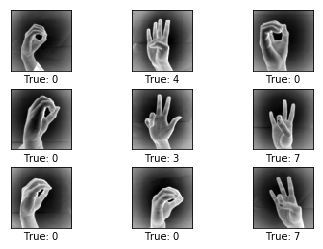

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



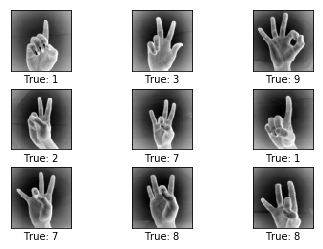

In [2]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential, Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, MaxPooling2D
from keras.optimizers import Adam

In [4]:
input_shape = (64,64)
adam_lr = 0.0001
nb_epochs = 10
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10
resultados = []

## Modelo 1 
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [5]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=input_shape))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 1s 790us/step - loss: 2.3048 - acc: 0.1466 - val_loss: 2.1692 - val_acc: 0.2159
Epoch 2/10
1576/1576 [==============================] - 1s 639us/step - loss: 2.1560 - acc: 0.2176 - val_loss: 2.1354 - val_acc: 0.2273
Epoch 3/10
1576/1576 [==============================] - 1s 676us/step - loss: 1.9981 - acc: 0.3395 - val_loss: 1.9300 - val_acc: 0.3580
Epoch 4/10
1576/1576 [==============================] - 1s 688us/step - loss: 1.8770 - acc: 0.3832 - val_loss: 1.8973 - val_acc: 0.3295
Epoch 5/10
1576/1576 [==============================] - 1s 633us/step - loss: 1.7967 - acc: 0.4118 - val_loss: 1.7914 - val_acc: 0.3693
Epoch 6/10
1576/1576 [==============================] - 1s 674us/step - loss: 1.7257 - acc: 0.4689 - val_loss: 1.7522 - val_acc: 0.3466
Epoch 7/10
1576/1576 [==============================] - 1s 649us/step - loss: 1.6385 - acc: 0.5070 - val_loss: 1.6562 - val_acc: 0.5057
E

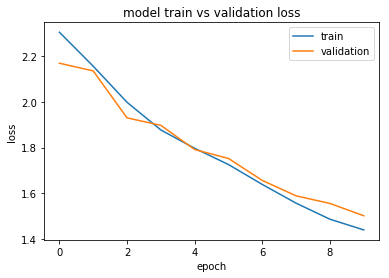

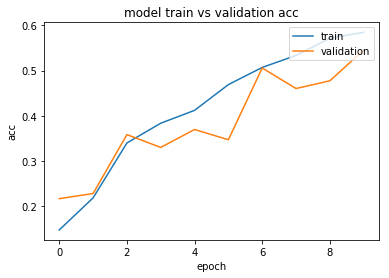

Acertos: 185 / 310
Confusion matrix, without normalization
[[27  1  1  0  2  0  0  1  0  0]
 [ 3 13  5  0  1  0  0  0  2  0]
 [ 2  1 30  0  1  0  0  0  0  0]
 [ 1  0  7 22  0  0  0  0  0  0]
 [ 3  0  3  0 13  2  0  7  0  2]
 [ 0  0  0  4  2 26  0  1  0  2]
 [ 1  0 10  1 11  0  0  4  1  0]
 [ 3  2 14  0  0  1  0 21  0  1]
 [ 2  1  7  1  0  0  0  3  7  7]
 [ 0  0  0  0  1  0  0  0  0 26]]
CPU times: user 19.6 s, sys: 6.13 s, total: 25.7 s
Wall time: 11.4 s


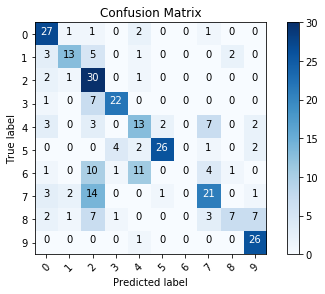

In [6]:
%%time
acertos, pred_1 = execute_model(model_1, X_train, Y_train, X_test, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_1', 'acertos': acertos})

## Modelo 2
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [7]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(3, 3))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_2 = Model(inputs=x, outputs=y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [8]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 2s 2ms/step - loss: 2.3230 - acc: 0.1117 - val_loss: 2.2468 - val_acc: 0.1989
Epoch 2/10
1576/1576 [==============================] - 2s 1ms/step - loss: 2.2350 - acc: 0.1821 - val_loss: 2.1291 - val_acc: 0.4432
Epoch 3/10
1576/1576 [==============================] - 2s 1ms/step - loss: 2.0970 - acc: 0.2912 - val_loss: 2.0057 - val_acc: 0.4489
Epoch 4/10
1576/1576 [==============================] - 2s 1ms/step - loss: 1.9510 - acc: 0.4232 - val_loss: 1.8455 - val_acc: 0.5568
Epoch 5/10
1576/1576 [==============================] - 2s 1ms/step - loss: 1.8068 - acc: 0.4765 - val_loss: 1.7120 - val_acc: 0.5966
Epoch 6/10
1576/1576 [==============================] - 2s 1ms/step - loss: 1.6671 - acc: 0.5349 - val_loss: 1.5905 - val_acc: 0.5966
Epoch 7/10
1576/1576 [==============================] - 2s 1ms/step - loss: 1.5539 - acc: 0.5812 - val_loss: 1.4892 - val_acc: 0.6080
Epoch 8/10
1576

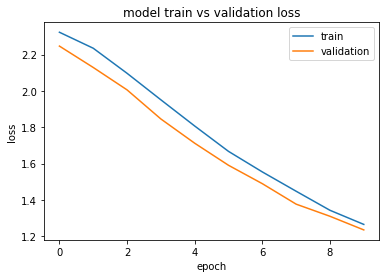

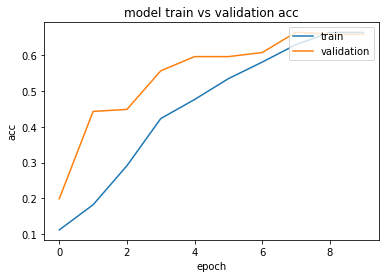

Acertos: 208 / 310
Confusion matrix, without normalization
[[28  0  0  0  0  0  1  0  3  0]
 [ 4 17  0  0  0  0  0  3  0  0]
 [ 1  1 24  1  0  0  3  4  0  0]
 [ 0  1  2 27  0  0  0  0  0  0]
 [ 2  0  0  0  7  3  7 10  0  1]
 [ 0  0  0  5  2 27  0  1  0  0]
 [ 0  1  3  0  3  0 17  4  0  0]
 [ 2  2  1  0  0  0  3 33  1  0]
 [ 0  1  0  0  2  1  2  9 13  0]
 [ 0  0  0  1  1  7  0  2  1 15]]
CPU times: user 43.8 s, sys: 9.98 s, total: 53.7 s
Wall time: 22.6 s


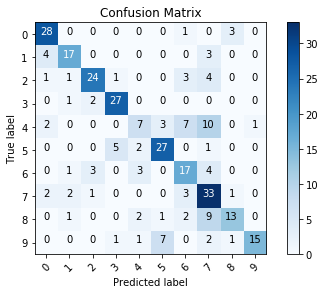

In [9]:
%%time
acertos, pred_2 = execute_model(model_2, expand_train_X, Y_train, expand_test_X, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_2', 'acertos': acertos})

## Modelo 3 
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [10]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(5, 5), activation='relu')(y)
y = MaxPooling2D(pool_size=(4, 4))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_3 = Model(inputs=x, outputs=y)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               86528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 3s 2ms/step - loss: 2.2832 - acc: 0.1472 - val_loss: 2.2203 - val_acc: 0.2727
Epoch 2/10
1576/1576 [==============================] - 3s 2ms/step - loss: 2.1671 - acc: 0.3299 - val_loss: 2.0739 - val_acc: 0.4659
Epoch 3/10
1576/1576 [==============================] - 3s 2ms/step - loss: 2.0152 - acc: 0.5000 - val_loss: 1.9069 - val_acc: 0.5795
Epoch 4/10
1576/1576 [==============================] - 3s 2ms/step - loss: 1.8411 - acc: 0.5647 - val_loss: 1.7267 - val_acc: 0.6420
Epoch 5/10
1576/1576 [==============================] - 3s 2ms/step - loss: 1.6739 - acc: 0.6028 - val_loss: 1.5666 - val_acc: 0.7102
Epoch 6/10
1576/1576 [==============================] - 3s 2ms/step - loss: 1.5233 - acc: 0.6332 - val_loss: 1.4207 - val_acc: 0.7045
Epoch 7/10
1576/1576 [==============================] - 3s 2ms/step - loss: 1.3718 - acc: 0.6827 - val_loss: 1.2937 - val_acc: 0.6989
Epoch 8/10
1576

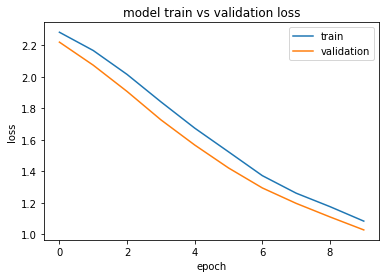

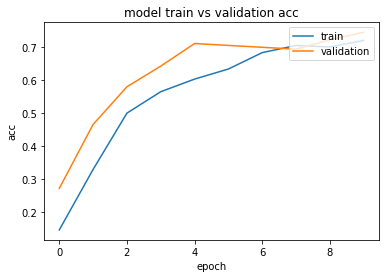

Acertos: 226 / 310
Confusion matrix, without normalization
[[29  2  0  0  0  0  0  0  1  0]
 [ 3 18  1  0  0  0  0  0  2  0]
 [ 0  2 28  0  0  0  3  1  0  0]
 [ 0  0  3 27  0  0  0  0  0  0]
 [ 2  0  1  0 19  1  0  3  3  1]
 [ 0  0  0  4  2 28  0  0  0  1]
 [ 1  0  6  0  4  0 15  1  1  0]
 [ 3  0  4  0  3  0  0 24  7  1]
 [ 0  1  2  0  3  0  0  2 16  4]
 [ 0  0  0  0  1  2  1  0  1 22]]
CPU times: user 1min 17s, sys: 7.41 s, total: 1min 25s
Wall time: 32.5 s


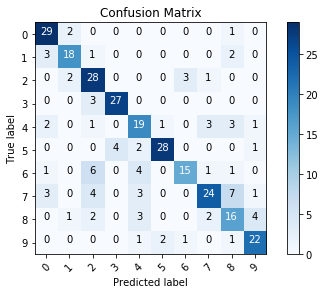

In [11]:
%%time
acertos, pred_3 = execute_model(model_3, expand_train_X, Y_train, expand_test_X, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_3', 'acertos': acertos})

## Modelo 4 - MobileNet (com freeze em todas as camadas)

In [ ]:
Y_train.shape

## Modelo 5 - VGG16 (com freeze em todas as camadas)